In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import sys

sys.path.append("/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Projects-Porfolio/Tech-Sector-Deep-Dive/")

#from src.data.
from src.utils.load_logging import *
from src.helper.metrics import calculate_metrics, calculate_market_metrics
from src.helper.helpers import load_merged_data


logging = load_logger()



In [17]:
# #aapl_financial_metrics, aapl_market_data = load_merged_data('AAPL')
# msft_financial_metrics, msft_market_data = load_merged_data('MSFT')
# nvda_financial_metrics, nvda_market_data = load_merged_data('NVDA')
# amd_financial_metrics, amd_market_data = load_merged_data('AMZN')
# goog_financial_metrics, goog_market_data = load_merged_data('GOOGL')




In [18]:
# msft_financial_metrics.head()



In [21]:
aapl_financial_metrics = pd.read_csv("/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Projects-Porfolio/Tech-Sector-Deep-Dive/data/processed/fundamentals-analysis/metrics_annual_AAPL.csv")
aapl_market_data = pd.read_csv('/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Projects-Porfolio/Tech-Sector-Deep-Dive/data/raw/AAPL_historical_data.csv')


aapl_market_data.head()
aapl_market_data['Date'] = pd.to_datetime(aapl_market_data['Date'], utc=True).dt.strftime('%Y-%m-%d')
aapl_market_metrics = calculate_market_metrics(aapl_market_data)
#_appl = pd.read_csv('/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Projects-Porfolio/Tech-Sector-Deep-Dive/data/processed/_AAPL.csv')

aapl_financial_metrics = calculate_metrics(aapl_financial_metrics)
aapl_financial_metrics = aapl_financial_metrics.rename(columns={'Year': 'Date'})
aapl_financial_metrics.head()

2024-12-10 16:26:49,054 [INFO] src.utils.load_logging: Market metrics calculated successfully.
2024-12-10 16:26:49,055 [ERROR] src.utils.load_logging: Missing expected column in DataFrame: 'grossProfit'
2024-12-10 16:26:49,056 [ERROR] src.utils.load_logging: Required column missing in DataFrame: 'grossProfit'


KeyError: 'grossProfit'

In [20]:
aapl_market_metrics.head()

aapl_financial_metrics.dtypes
aapl_financial_metrics['Date'] = pd.to_datetime(aapl_financial_metrics['Date'], errors='coerce')
aapl_financial_metrics.dtypes



Date                  datetime64[ns]
gross_margin                 float64
operating_margin             float64
net_margin                   float64
ebitda_margin                float64
opex_ratio                   float64
rd_to_revenue                float64
sga_to_revenue               float64
effective_tax_rate           float64
interest_coverage            float64
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                         int64
Dividends                    float64
Stock Splits                 float64
daily_returns                float64
trading_range                float64
volume_change                float64
volatility_20d               float64
MA20                         float64
MA50                         float64
RSI                          float64
dtype: object

In [7]:
merged_df = pd.merge(aapl_financial_metrics, aapl_market_metrics, on='Date')
merged_df.head()


,Date,gross_margin,operating_margin,net_margin,ebitda_margin,opex_ratio,rd_to_revenue,sga_to_revenue,effective_tax_rate,interest_coverage,...,Volume_y,Dividends_y,Stock Splits_y,daily_returns_y,trading_range_y,volume_change_y,volatility_20d_y,MA20_y,MA50_y,RSI_y
0,2024-09-30,0.462063,0.315102,0.239713,0.344371,14.696127,8.022300,6.673827,0.240912,0.000000,...,54541900,0.0,0.0,0.022872,0.014563,0.602948,0.014810,223.512093,221.946123,69.776031
1,2022-09-30,0.436340,0.305156,0.254992,0.333526,13.118394,6.707001,6.411393,0.162045,41.635619,...,124925300,0.0,0.0,-0.030039,0.036099,-0.025074,0.023556,150.915009,157.766599,20.818859
2,2021-09-30,0.420836,0.299993,0.260703,0.331064,12.084357,6.034055,6.050301,0.133023,42.288091,...,89056700,0.0,0.0,-0.009312,0.021579,0.193758,0.013332,145.496830,145.393177,31.555490
3,2020-09-30,0.386376,0.244027,0.211348,0.284728,14.234912,6.903203,7.331709,0.144282,24.352245,...,142675200,0.0,0.0,0.015076,0.031989,0.435621,0.033721,111.451867,110.249336,53.429925
4,2019-09-30,0.383448,0.249145,0.215341,0.298042,13.430346,6.320002,7.110344,0.159438,19.382830,...,103909600,0.0,0.0,0.023535,0.017157,0.024669,0.013506,52.677432,50.885987,60.841095


In [8]:
print(merged_df.columns)

import numpy as np

x = np.array(merged_df['Date'])
y = np.array(merged_df.drop(columns=['Date']))

#sns.histplot(data=merged_df,
            #  x='Date',
#             #  y=['gross_margin','rd_to_revenue','net_margin', 'daily_returns', 'trading_range']
#              )
# plt.show()
assert (len(x) == len(y))

Index(['Date', 'gross_margin', 'operating_margin', 'net_margin',
       'ebitda_margin', 'opex_ratio', 'rd_to_revenue', 'sga_to_revenue',
       'effective_tax_rate', 'interest_coverage', 'Open_x', 'High_x', 'Low_x',
       'Close_x', 'Volume_x', 'Dividends_x', 'Stock Splits_x',
       'daily_returns_x', 'trading_range_x', 'volume_change_x',
       'volatility_20d_x', 'MA20_x', 'MA50_x', 'RSI_x', 'Open_y', 'High_y',
       'Low_y', 'Close_y', 'Volume_y', 'Dividends_y', 'Stock Splits_y',
       'daily_returns_y', 'trading_range_y', 'volume_change_y',
       'volatility_20d_y', 'MA20_y', 'MA50_y', 'RSI_y'],
      dtype='object')


In [9]:
# merged_df.to_csv('/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Projects-Porfolio/Tech-Sector-Deep-Dive/data/cleaned/all_metrics_AAPL.csv', index=False)

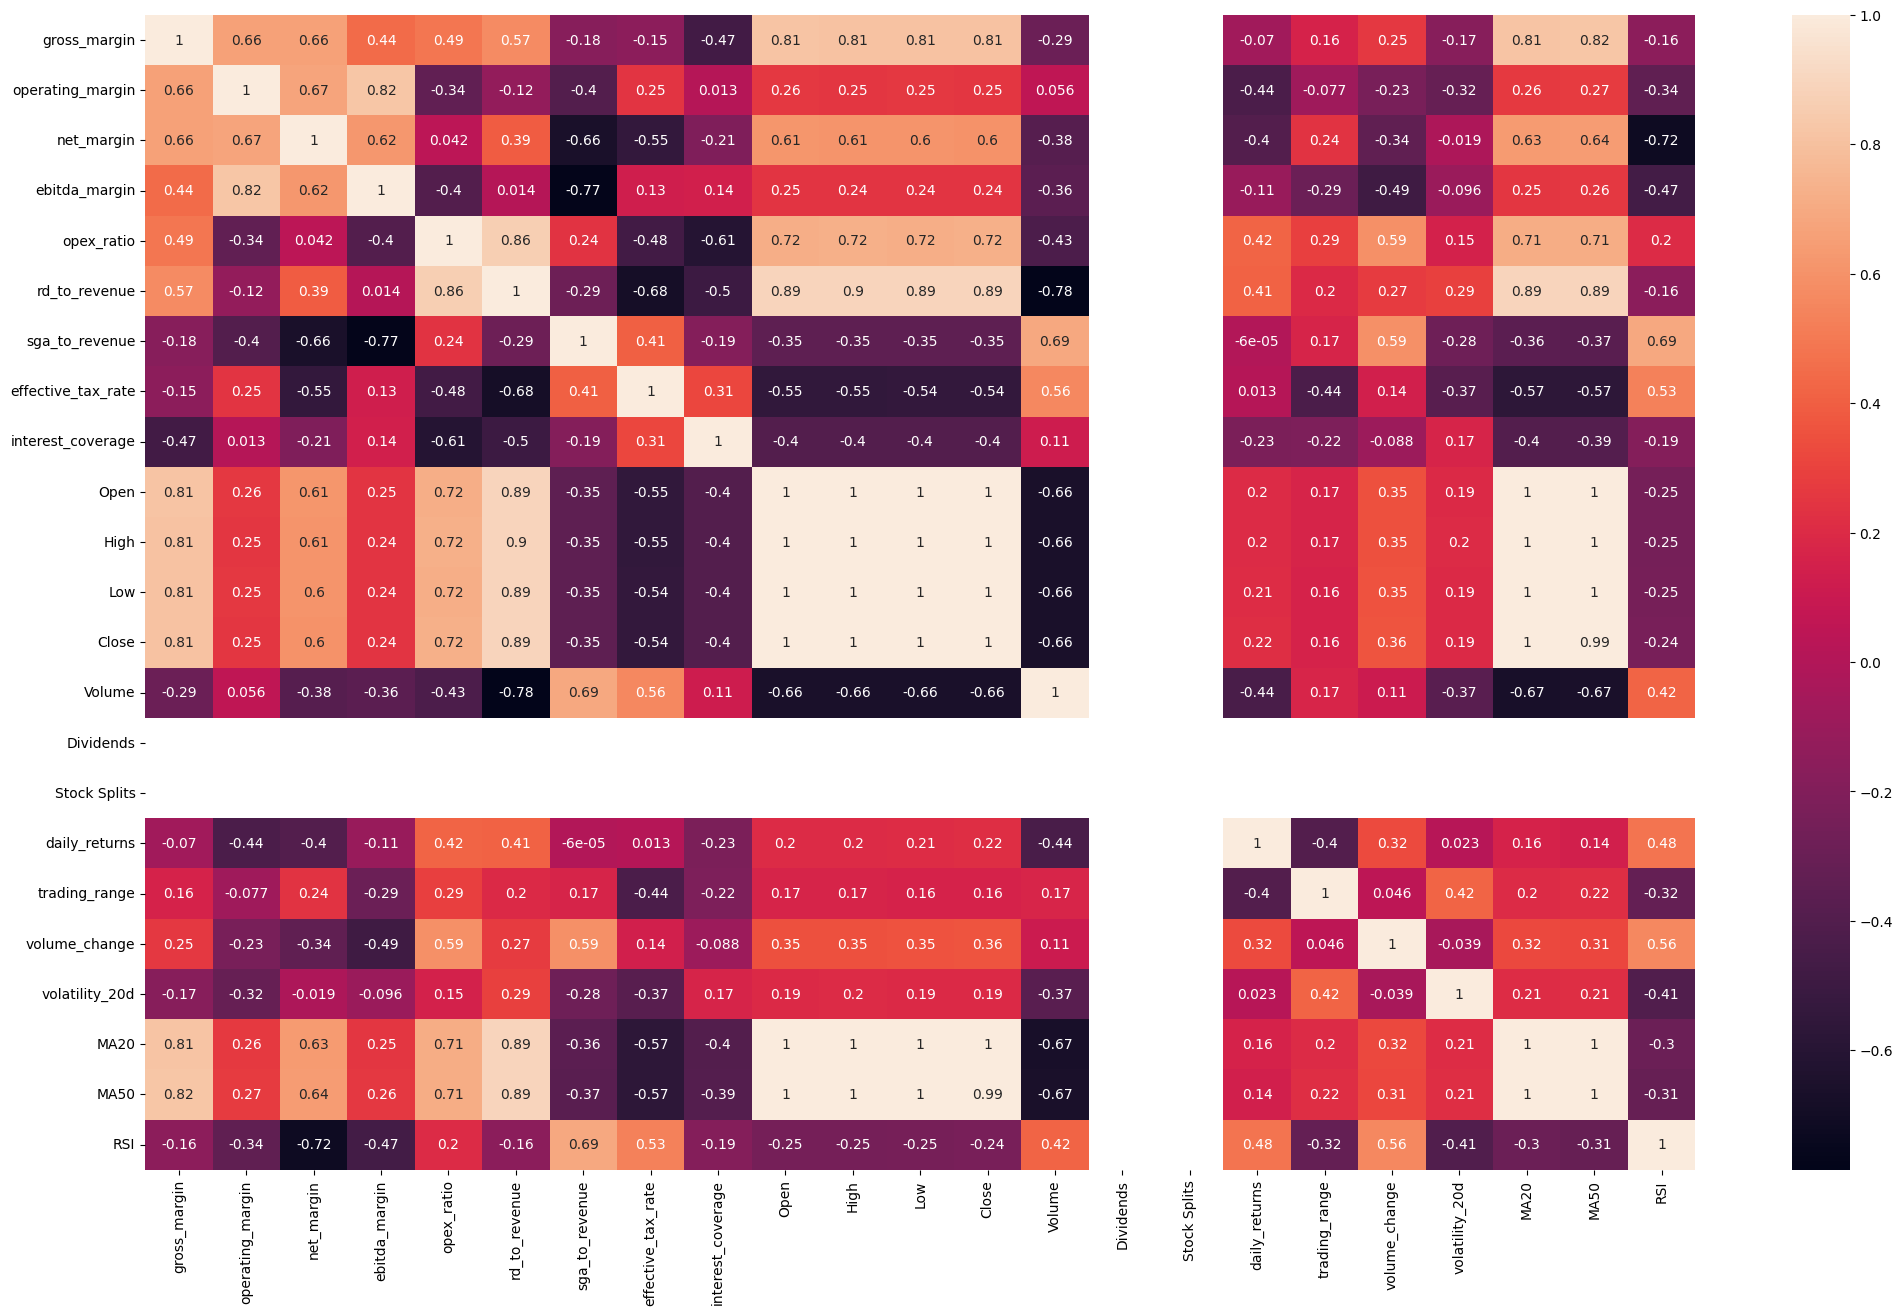

In [24]:
merged_df_appl = pd.read_csv('/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Projects-Porfolio/Tech-Sector-Deep-Dive/data/cleaned/all_metrics_AAPL.csv')

plt.figure(figsize=(25,15))
merged_df_appl['Date'] = pd.to_datetime(merged_df_appl['Date'])
merged_df_appl = merged_df_appl.set_index('Date')
sns.heatmap(merged_df_appl.corr(), annot=True)
plt.show()

merged_df = merged_df_appl


In [25]:
# Create candlestick chart with improved styling and layout
fig = go.Figure(data=[go.Candlestick(x=merged_df.index,
                                    open=merged_df['Open'],
                                    high=merged_df['High'],
                                    low=merged_df['Low'],
                                    close=merged_df['Close'],
                                    increasing_line_color='#26A69A',  # Green for increasing
                                    decreasing_line_color='#EF5350'   # Red for decreasing
                                    )])

# Update layout for better visualization
fig.update_layout(
    title='AAPL Stock Price History',
    yaxis_title='Stock Price (USD)',
    xaxis_title='Date',
    template='plotly_white',
    yaxis_gridcolor='rgba(128, 128, 128, 0.2)',
    xaxis_gridcolor='rgba(128, 128, 128, 0.2)',
    plot_bgcolor='rgba(0,0,0,0)',
    width=1200,
    height=800
)

# Add range slider and buttons for time period selection
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1m", step="month", stepmode="backward"),
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="YTD", step="year", stepmode="todate"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ))

fig.show()


,Gross Margin,Operating Margin,Net Margin,EBITDA Margin,OpEx Ratio,R&D to Revenue,SG&A to Revenue,Effective Tax Rate,Interest Coverage,Daily Returns,Trading Range,20-Day Volatility,RSI
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,40.37,28.67,22.52,32.08,11.71,4.68,7.03,22.38,77.95,-0.01,2.14,1.78,53.81
std,2.48,2.30,2.00,2.32,1.98,2.01,1.05,5.86,102.34,1.76,0.81,0.63,17.55
min,37.65,24.40,19.19,28.47,8.96,2.24,6.05,13.30,0.00,-3.00,1.00,1.20,20.82
25%,38.66,27.72,21.41,29.71,9.82,3.01,6.39,16.14,23.11,-1.25,1.50,1.35,43.81
50%,39.76,28.74,21.67,33.03,11.66,4.06,6.63,24.32,41.96,0.31,2.03,1.60,52.20
75%,40.88,30.53,23.95,33.32,13.20,6.42,7.17,26.13,104.60,1.23,2.67,1.97,69.84
max,46.21,31.51,26.07,35.39,14.70,8.02,9.67,31.75,369.79,2.35,3.61,3.37,77.27


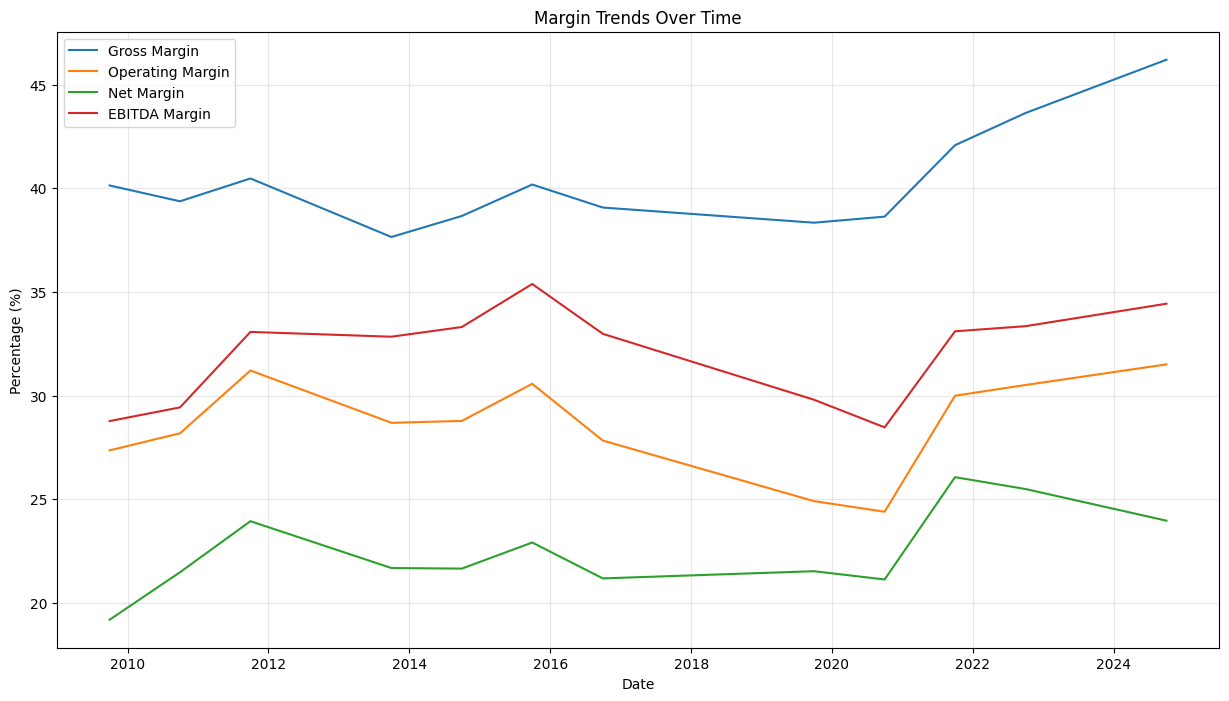

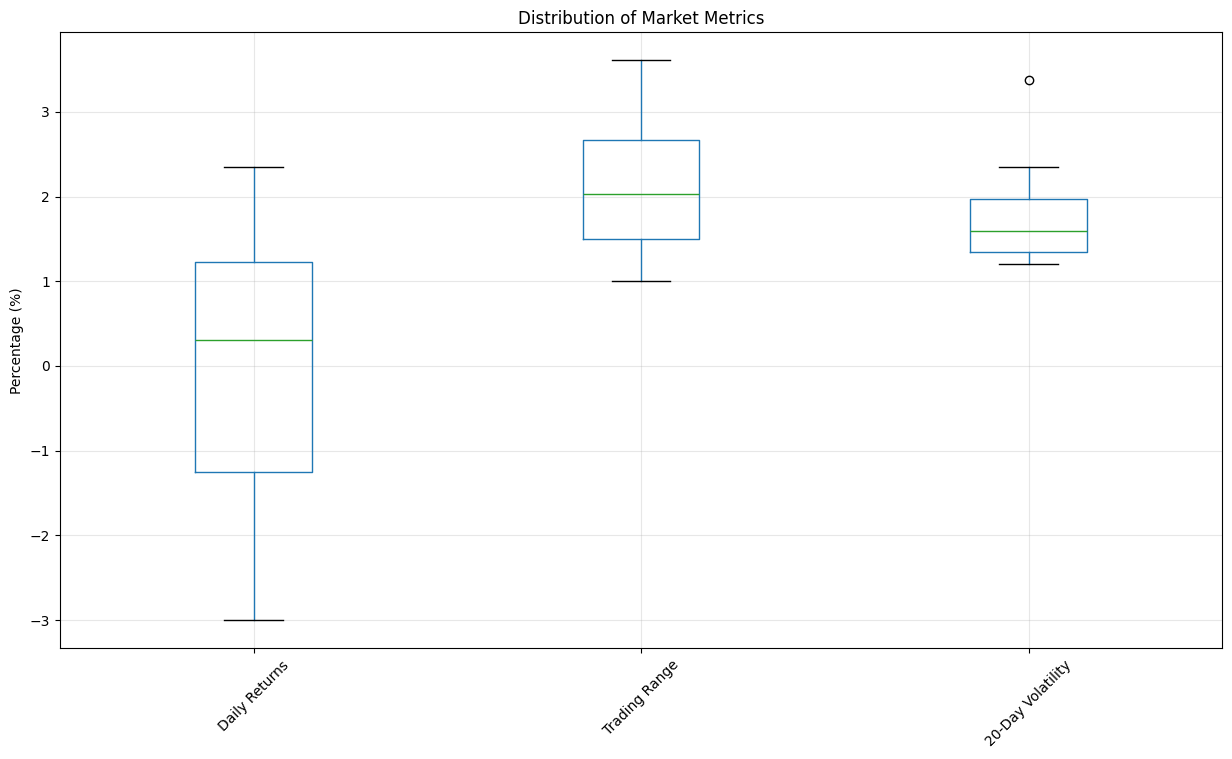

In [26]:
# Calculate key financial metrics
financial_metrics = pd.DataFrame()

# Profitability metrics
financial_metrics['Gross Margin'] = merged_df['gross_margin'] * 100
financial_metrics['Operating Margin'] = merged_df['operating_margin'] * 100
financial_metrics['Net Margin'] = merged_df['net_margin'] * 100
financial_metrics['EBITDA Margin'] = merged_df['ebitda_margin'] * 100

# Operational efficiency metrics
financial_metrics['OpEx Ratio'] = merged_df['opex_ratio']
financial_metrics['R&D to Revenue'] = merged_df['rd_to_revenue']
financial_metrics['SG&A to Revenue'] = merged_df['sga_to_revenue']

# Tax and interest metrics
financial_metrics['Effective Tax Rate'] = merged_df['effective_tax_rate'] * 100
financial_metrics['Interest Coverage'] = merged_df['interest_coverage']

# Market metrics
financial_metrics['Daily Returns'] = merged_df['daily_returns'] * 100
financial_metrics['Trading Range'] = merged_df['trading_range'] * 100
financial_metrics['20-Day Volatility'] = merged_df['volatility_20d'] * 100
financial_metrics['RSI'] = merged_df['RSI']

# Create a summary statistics table
metrics_summary = financial_metrics.describe()

# Display the summary statistics with improved formatting
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(metrics_summary)

# Create a time series plot of key margins
plt.figure(figsize=(15, 8))
for column in ['Gross Margin', 'Operating Margin', 'Net Margin', 'EBITDA Margin']:
    plt.plot(financial_metrics.index, financial_metrics[column], label=column)

plt.title('Margin Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Create a box plot to show the distribution of key metrics
plt.figure(figsize=(15, 8))
financial_metrics[['Daily Returns', 'Trading Range', '20-Day Volatility']].boxplot()
plt.title('Distribution of Market Metrics')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


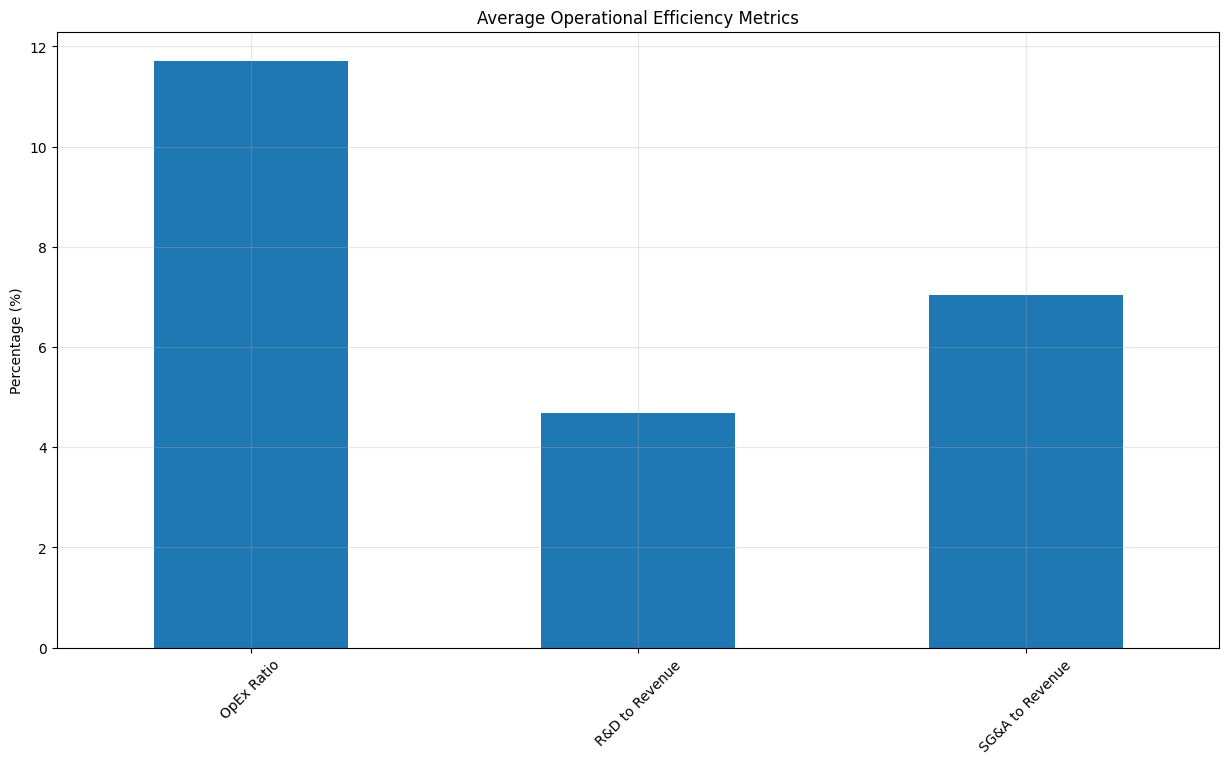

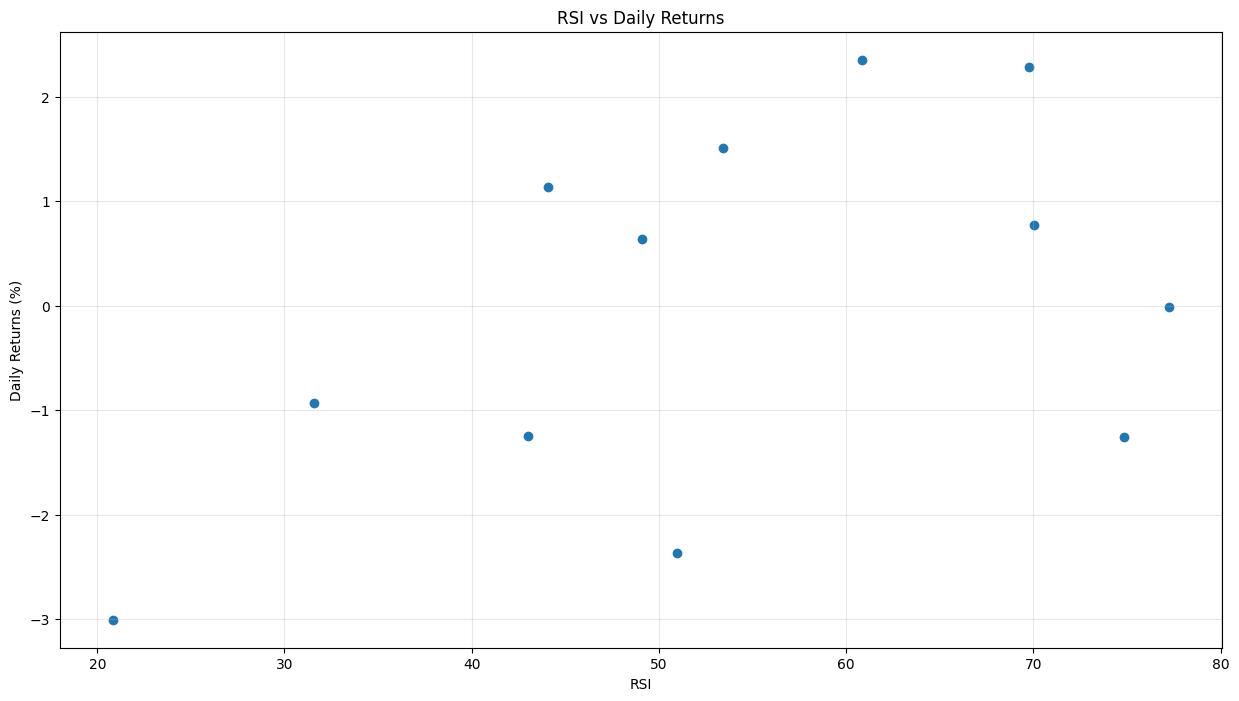

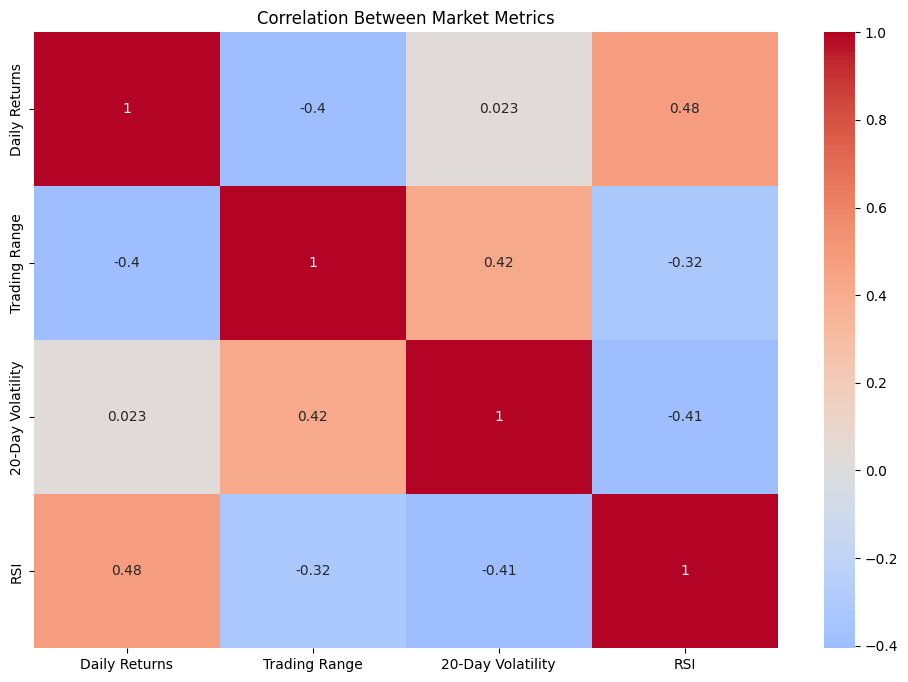

In [27]:
# Create a bar plot for operational efficiency metrics
plt.figure(figsize=(15, 8))
financial_metrics[['OpEx Ratio', 'R&D to Revenue', 'SG&A to Revenue']].mean().plot(kind='bar')
plt.title('Average Operational Efficiency Metrics')
plt.ylabel('Percentage (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# Create a scatter plot of RSI vs Daily Returns
plt.figure(figsize=(15, 8))
plt.scatter(financial_metrics['RSI'], financial_metrics['Daily Returns'])
plt.title('RSI vs Daily Returns')
plt.xlabel('RSI')
plt.ylabel('Daily Returns (%)')
plt.grid(True, alpha=0.3)
plt.show()

# Create a heatmap of correlations between market metrics
plt.figure(figsize=(12, 8))
market_metrics = financial_metrics[['Daily Returns', 'Trading Range', '20-Day Volatility', 'RSI']]
sns.heatmap(market_metrics.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Market Metrics')
plt.show()


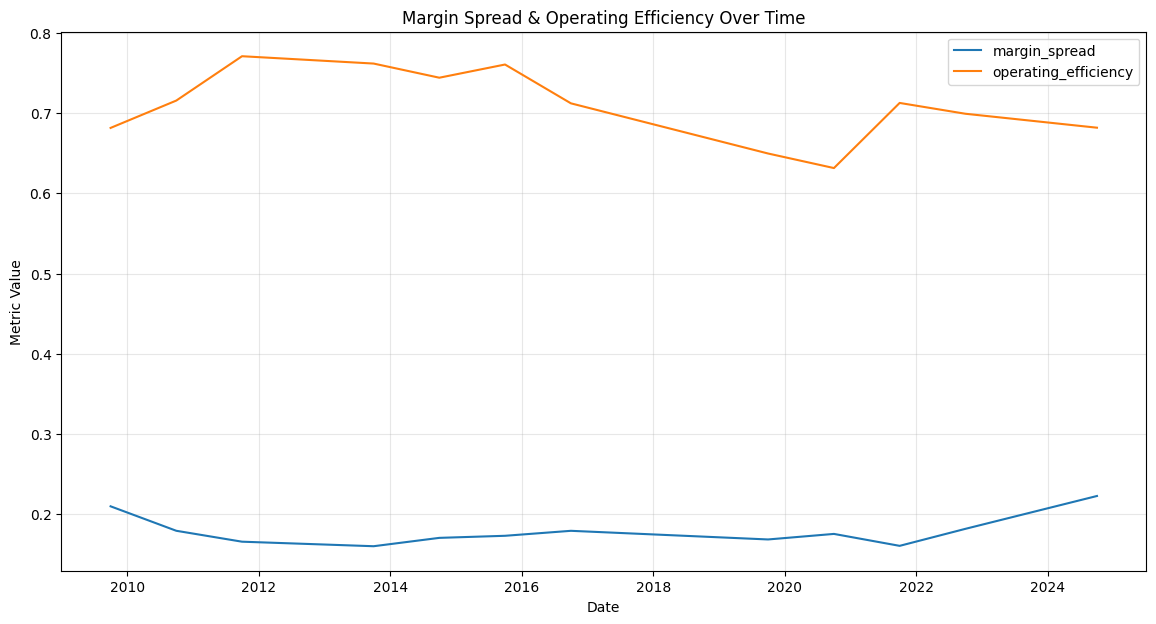

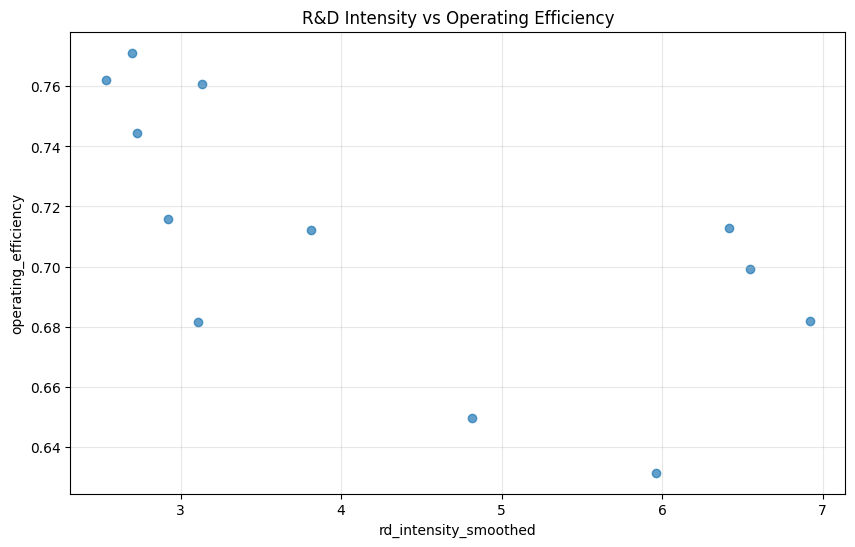

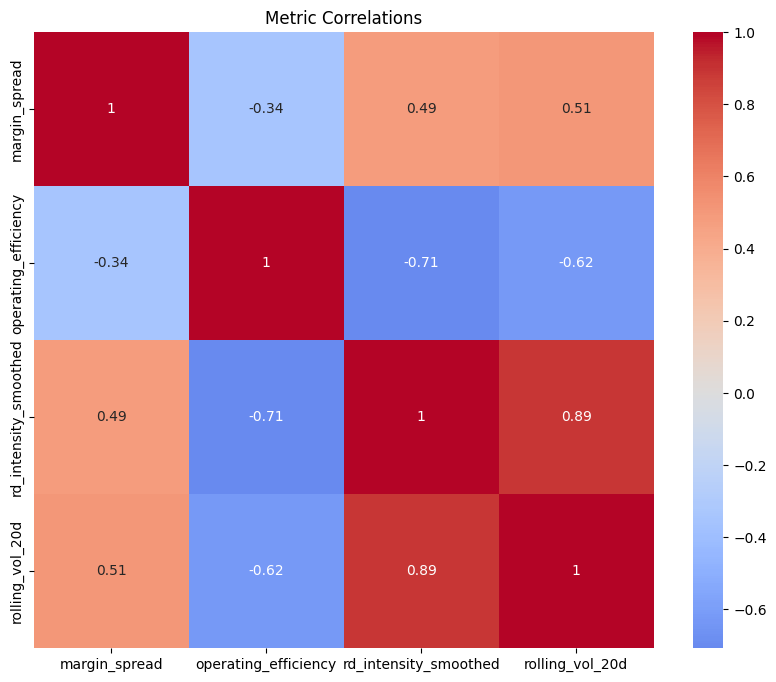

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from typing import List

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s:%(message)s')
logger = logging.getLogger(__name__)

def compute_new_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute new financial and market metrics based on existing columns.
    
    Assumes df has columns like:
    - gross_margin, net_margin, operating_margin, ebitda_margin
    - rd_to_revenue, sga_to_revenue
    - effective_tax_rate, interest_coverage
    - daily_returns, volatility_20d
    - RSI, trading_range
    - Date column as a time index or a datetime
    
    Returns:
        pd.DataFrame: The same DataFrame with new metric columns added.
    """
    # Ensure Date is a datetime and set as index if not already
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.set_index('Date', inplace=True)
        df.sort_index(inplace=True)
        logger.info("Date column converted to datetime and set as index.")

    # Example new metrics:
    # 1. Margin Spread: Difference between Gross Margin and Net Margin
    if 'gross_margin' in df.columns and 'net_margin' in df.columns:
        df['margin_spread'] = df['gross_margin'] - df['net_margin']
        logger.info("Computed 'margin_spread' as gross_margin - net_margin.")
    else:
        logger.warning("Columns 'gross_margin' or 'net_margin' not found. 'margin_spread' not computed.")

    # 2. Operating Efficiency Ratio: ratio of operating margin to gross margin
    if 'operating_margin' in df.columns and 'gross_margin' in df.columns:
        df['operating_efficiency'] = df['operating_margin'] / df['gross_margin']
        logger.info("Computed 'operating_efficiency' as operating_margin / gross_margin.")
    else:
        logger.warning("Columns 'operating_margin' or 'gross_margin' not found. 'operating_efficiency' not computed.")

    # 3. Adjusted R&D Intensity: R&D to revenue smoothed by rolling mean (e.g., 3-period)
    if 'rd_to_revenue' in df.columns:
        df['rd_intensity_smoothed'] = df['rd_to_revenue'].rolling(window=3, min_periods=1).mean()
        logger.info("Computed 'rd_intensity_smoothed' as 3-period rolling mean of rd_to_revenue.")
    else:
        logger.warning("Column 'rd_to_revenue' not found. 'rd_intensity_smoothed' not computed.")

    # 4. Tax Burden Change: Year-over-year difference in effective tax rate
    if 'effective_tax_rate' in df.columns:
        df['tax_burden_change'] = df['effective_tax_rate'].diff(252)  # Assuming ~252 trading days in a year
        logger.info("Computed 'tax_burden_change' as year-over-year diff in effective_tax_rate.")
    else:
        logger.warning("Column 'effective_tax_rate' not found. 'tax_burden_change' not computed.")

    # 5. Rolling Volatility of Returns: 20-day std of daily returns (if daily_returns exists)
    if 'daily_returns' in df.columns:
        df['rolling_vol_20d'] = df['daily_returns'].rolling(window=20, min_periods=1).std()
        logger.info("Computed 'rolling_vol_20d' as 20-day rolling std of daily_returns.")
    else:
        logger.warning("Column 'daily_returns' not found. 'rolling_vol_20d' not computed.")

    return df

def plot_time_series(df: pd.DataFrame, columns: List[str], title: str = "Time Series Plot of Metrics"):
    """
    Plot given metrics as time series.
    
    Args:
        df (pd.DataFrame): DataFrame with datetime index and metric columns.
        columns (List[str]): List of column names to plot.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(14, 7))
    for col in columns:
        if col in df.columns:
            plt.plot(df.index, df[col], label=col)
        else:
            logger.warning(f"Column '{col}' not found in DataFrame. Skipping.")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    logger.info(f"Time series plot for {columns} displayed.")

def plot_relationship(df: pd.DataFrame, x_col: str, y_col: str, title: str = "Metric Relationship"):
    """
    Plot a scatter plot to see relationship between two metrics.
    
    Args:
        df (pd.DataFrame): DataFrame containing the metrics.
        x_col (str): Column name for x-axis.
        y_col (str): Column name for y-axis.
        title (str): Title of the plot.
    """
    if x_col not in df.columns or y_col not in df.columns:
        logger.error(f"Required columns '{x_col}' or '{y_col}' not found in DataFrame.")
        return
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.7)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, alpha=0.3)
    plt.show()
    logger.info(f"Scatter plot for {x_col} vs {y_col} displayed.")

def plot_correlation_heatmap(df: pd.DataFrame, cols: List[str], title: str = "Correlation Heatmap"):
    """
    Plot a correlation heatmap for given columns.
    
    Args:
        df (pd.DataFrame): DataFrame containing the metrics.
        cols (List[str]): Columns to include in correlation.
        title (str): Title of the correlation plot.
    """
    subset = df[cols].dropna()
    if subset.empty:
        logger.error("No valid data available for correlation heatmap.")
        return

    corr = subset.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title(title)
    plt.show()
    logger.info("Correlation heatmap displayed.")


# Example usage:
df = pd.read_csv("/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Projects-Porfolio/Tech-Sector-Deep-Dive/data/cleaned/all_metrics_AAPL.csv")  # The CSV you've shown
df_with_new_metrics = compute_new_metrics(df)
plot_time_series(df_with_new_metrics, ["margin_spread", "operating_efficiency"], "Margin Spread & Operating Efficiency Over Time")
plot_relationship(df_with_new_metrics, "rd_intensity_smoothed", "operating_efficiency", "R&D Intensity vs Operating Efficiency")
plot_correlation_heatmap(df_with_new_metrics, ["margin_spread", "operating_efficiency", "rd_intensity_smoothed", "rolling_vol_20d"], "Metric Correlations")

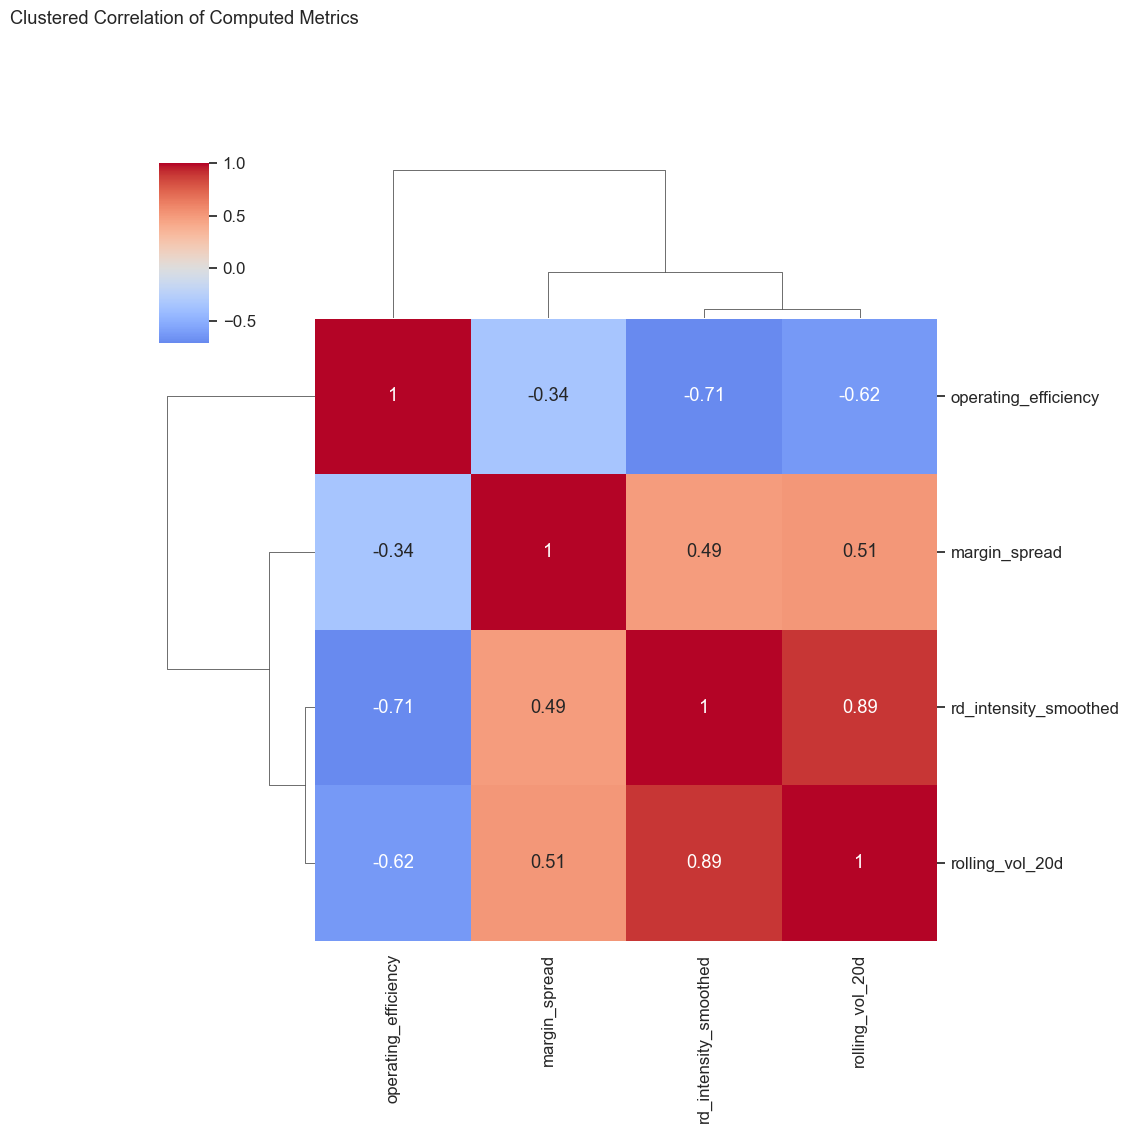

In [29]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from typing import List

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s:%(message)s')
logger = logging.getLogger(__name__)

def compute_new_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute new financial and market metrics based on existing columns.
    """
    # Ensure Date is a datetime and set as index if not already
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.sort_values('Date', inplace=True)
        df.set_index('Date', inplace=True)
        logger.info("Date column converted to datetime and set as index.")

    # Example new metrics:
    if 'gross_margin' in df.columns and 'net_margin' in df.columns:
        df['margin_spread'] = df['gross_margin'] - df['net_margin']
        logger.info("Computed 'margin_spread'.")
    else:
        logger.warning("'gross_margin' or 'net_margin' missing; 'margin_spread' not computed.")

    if 'operating_margin' in df.columns and 'gross_margin' in df.columns:
        df['operating_efficiency'] = df['operating_margin'] / df['gross_margin']
        logger.info("Computed 'operating_efficiency'.")
    else:
        logger.warning("'operating_margin' or 'gross_margin' missing; 'operating_efficiency' not computed.")

    if 'rd_to_revenue' in df.columns:
        df['rd_intensity_smoothed'] = df['rd_to_revenue'].rolling(window=3, min_periods=1).mean()
        logger.info("Computed 'rd_intensity_smoothed'.")
    else:
        logger.warning("'rd_to_revenue' missing; 'rd_intensity_smoothed' not computed.")

    if 'effective_tax_rate' in df.columns:
        df['tax_burden_change'] = df['effective_tax_rate'].diff(252)  # Roughly 1-year difference
        logger.info("Computed 'tax_burden_change'.")
    else:
        logger.warning("'effective_tax_rate' missing; 'tax_burden_change' not computed.")

    if 'daily_returns' in df.columns:
        df['rolling_vol_20d'] = df['daily_returns'].rolling(window=20, min_periods=1).std()
        logger.info("Computed 'rolling_vol_20d'.")
    else:
        logger.warning("'daily_returns' missing; 'rolling_vol_20d' not computed.")

    return df

def plot_interactive_timeseries(df: pd.DataFrame, metrics: List[str], title: str = "Interactive Time Series"):
    """
    Create an interactive time-series chart with multiple metrics, using Plotly.
    Each metric can have a different axis if ranges vary widely.
    Adds a range slider and selectors.
    """
    fig = go.Figure()

    # Add a separate y-axis for each metric if needed
    # Limit to at most 4 metrics for separate y-axes to avoid clutter.
    for i, metric in enumerate(metrics):
        if metric not in df.columns:
            logger.warning(f"{metric} not in DataFrame. Skipping.")
            continue

        axis_name = f"yaxis{i+1}" if i > 0 else "yaxis"
        fig.add_trace(go.Scatter(
            x=df.index,
            y=df[metric],
            mode='lines+markers',
            name=metric,
            yaxis=axis_name
        ))

    # Update layout for multiple y-axes if there are multiple metrics
    fig.update_layout(
        title=title,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        )
    )

    # Add secondary y-axes if more than one metric
    if len(metrics) > 1:
        for i in range(1, len(metrics)):
            fig.update_layout({
                f'yaxis{i+1}': dict(
                    overlaying='y',
                    side='right',
                    position=1 - (i * 0.05),
                    showgrid=False
                )
            })

    fig.show()
    logger.info(f"Interactive time series plot displayed for metrics: {metrics}")

def plot_3d_relationship(df: pd.DataFrame, metrics: List[str], title: str = "3D Metric Relationship"):
    """
    Create a 3D scatter plot to visualize the relationship among three metrics.
    This allows for a more complex view than a 2D scatter.
    """
    if len(metrics) < 3:
        logger.error("Need at least 3 metrics for a 3D scatter plot.")
        return

    for metric in metrics:
        if metric not in df.columns:
            logger.error(f"Metric '{metric}' not found in DataFrame.")
            return

    fig = px.scatter_3d(
        df.reset_index(), 
        x=metrics[0], 
        y=metrics[1], 
        z=metrics[2],
        color=metrics[1],
        hover_data=metrics[3:] if len(metrics) > 3 else None,
        title=title
    )

    fig.show()
    logger.info(f"3D relationship plot displayed for metrics: {metrics}")

def plot_parallel_coordinates(df: pd.DataFrame, metrics: List[str], title: str = "Parallel Coordinates of Metrics"):
    """
    Plot a parallel coordinates chart to visualize how multiple metrics relate across time.
    Each line is a point in time. This can help see patterns among many dimensions.
    """
    for metric in metrics:
        if metric not in df.columns:
            logger.error(f"Metric '{metric}' not found in DataFrame.")
            return

    # Reset index to have the date as a column for hover
    temp_df = df.reset_index().dropna(subset=metrics)
    fig = px.parallel_coordinates(
        temp_df,
        dimensions=metrics,
        color=metrics[0],
        title=title,
        color_continuous_scale=px.colors.sequential.Viridis
    )
    fig.show()
    logger.info(f"Parallel coordinates plot displayed for metrics: {metrics}")

def plot_clustered_correlation(df: pd.DataFrame, metrics: List[str], title: str = "Clustered Correlation Heatmap"):
    """
    Plot a clustered correlation heatmap using Seaborn's clustermap.
    Clustering groups similar metrics together to reveal deeper structure.
    """
    subset = df[metrics].dropna()
    if subset.empty:
        logger.error("No valid data available for correlation clustermap.")
        return
    
    corr = subset.corr()
    sns.set(font_scale=1.1)
    g = sns.clustermap(corr, annot=True, cmap='coolwarm', center=0, figsize=(10,10))
    plt.title(title, pad=100)
    plt.show()
    logger.info("Clustered correlation heatmap displayed.")

def plot_candlestick_with_metric(df: pd.DataFrame, metric: str, title: str = "Candlestick with Overlaid Metric"):
    """
    If the dataset includes 'Open', 'High', 'Low', 'Close' columns, create a candlestick chart,
    and overlay the chosen metric as a line.
    """
    required_cols = ['Open', 'High', 'Low', 'Close']
    if not all(col in df.columns for col in required_cols):
        logger.error("Candlestick requires 'Open', 'High', 'Low', 'Close' columns.")
        return
    if metric not in df.columns:
        logger.error(f"'{metric}' not found in DataFrame.")
        return

    fig = go.Figure(data=[go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='Price'
    )])

    # Add a secondary y-axis for the metric
    fig.update_layout(
        yaxis2=dict(
            overlaying='y',
            side='right',
            title=metric,
            showgrid=False
        ),
        title=title,
        xaxis_rangeslider_visible=False
    )

    # Add the metric as a line on the secondary y-axis
    fig.add_trace(go.Scatter(
        x=df.index, 
        y=df[metric], 
        name=metric, 
        yaxis='y2',
        line=dict(color='blue', width=2)
    ))

    fig.show()
    logger.info(f"Candlestick chart with '{metric}' overlay displayed.")


# Example usage:
# df = pd.read_csv("/path/to/all_metrics_AAPL.csv")
df_with_new_metrics = compute_new_metrics(df)

#Plot advanced time series:
# plot_interactive_timeseries(df_with_new_metrics, ["margin_spread", "operating_efficiency", "rolling_vol_20d"], 
#                             "Complex Interactive Time Series")

#Plot a 3D scatter of three metrics:
plot_3d_relationship(df_with_new_metrics, ["margin_spread", "operating_efficiency", "rd_intensity_smoothed"], 
                     "3D View of Margins and R&D Intensity")

#Plot parallel coordinates across several metrics:
plot_parallel_coordinates(df_with_new_metrics, ["margin_spread", "operating_efficiency", "rd_intensity_smoothed", "rolling_vol_20d"], 
                          "Parallel Coordinates of Computed Metrics")

#Plot a clustered correlation heatmap:
plot_clustered_correlation(df_with_new_metrics, ["margin_spread", "operating_efficiency", "rd_intensity_smoothed", "rolling_vol_20d"], 
                           "Clustered Correlation of Computed Metrics")

#If price data is included, overlay a metric on a candlestick chart:
plot_candlestick_with_metric(df_with_new_metrics, "operating_efficiency", "Apple Stock Candlestick & Operating Efficiency")

/var/folders/8p/tyj3gj5j7f54558fzrt60f700000gn/T/ipykernel_78851/3732227138.py:63: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



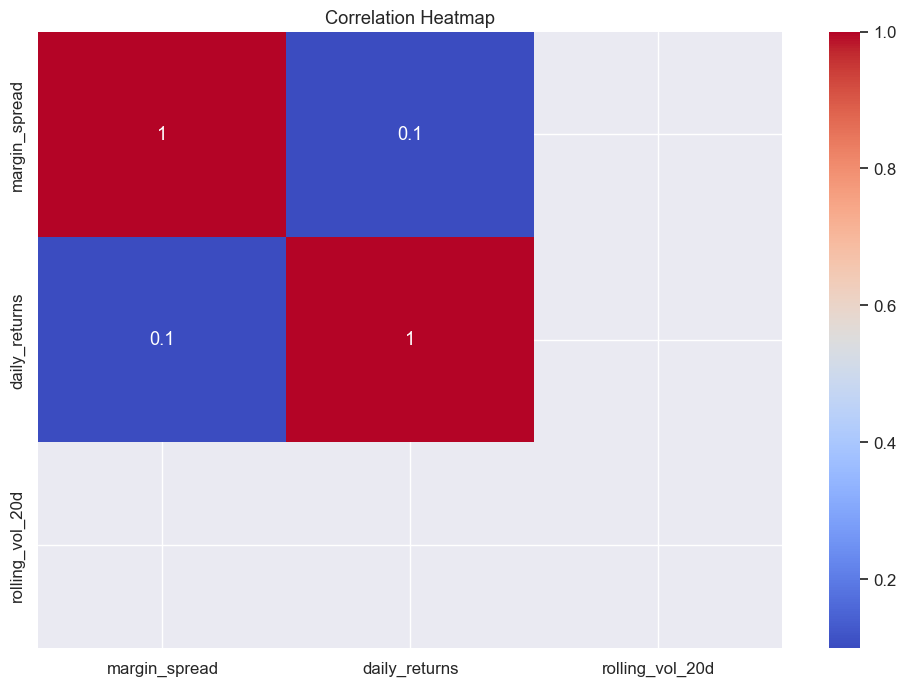

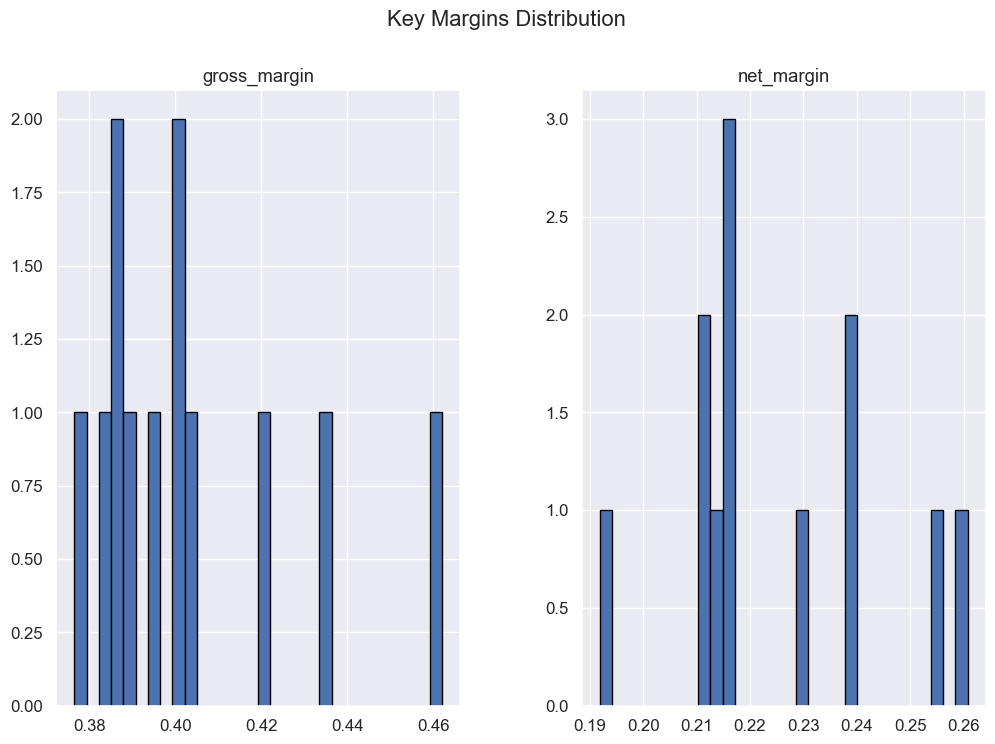

In [38]:
import pandas as pd
import numpy as np
import os
import logging
from typing import Optional, List
import seaborn as sns
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s:%(message)s')
logger = logging.getLogger(__name__)

def load_csv(filepath: str, parse_dates: Optional[List[str]] = None, index_col: Optional[str] = None) -> pd.DataFrame:
    """
    Load a CSV file into a DataFrame.

    Args:
        filepath (str): The path to the CSV file.
        parse_dates (List[str], optional): List of column names to parse as dates.
        index_col (str, optional): Column to set as index.

    Returns:
        pd.DataFrame: Loaded DataFrame.

    Raises:
        FileNotFoundError: If the file does not exist.
        ValueError: If the resulting DataFrame is empty.
    """
    if not os.path.exists(filepath):
        logger.error(f"File not found: {filepath}")
        raise FileNotFoundError(f"File not found: {filepath}")
    
    try:
        df = pd.read_csv(filepath, parse_dates=parse_dates, index_col=index_col)
        if df.empty:
            logger.error(f"The DataFrame loaded from {filepath} is empty.")
            raise ValueError("Loaded DataFrame is empty.")
        logger.info(f"Successfully loaded CSV: {filepath}, shape: {df.shape}")
        return df
    except Exception as e:
        logger.error(f"Error loading CSV from {filepath}: {str(e)}")
        raise e

def clean_data(df: pd.DataFrame, fill_method: str = "ffill", fill_value: float = 0) -> pd.DataFrame:
    """
    Clean a DataFrame by handling missing values and ensuring numeric columns are numeric.

    Steps:
    - Tries forward filling NaN values.
    - If still missing, fill them with a specified fill_value.
    - Convert all numeric columns to numeric data types.

    Args:
        df (pd.DataFrame): Input DataFrame.
        fill_method (str): Method to fill missing values (e.g. "ffill", "bfill").
        fill_value (float): Value to fill remaining NaNs after method fill.

    Returns:
        pd.DataFrame: Cleaned DataFrame.
    """
    try:
        # Handle missing values
        df = df.fillna(method=fill_method).fillna(fill_value)
        logger.info("Missing values handled.")

        # Convert numeric columns to numeric dtypes
        for col in df.columns:
            if df[col].dtype == object:
                # Attempt conversion
                df[col] = pd.to_numeric(df[col], errors='ignore')
        
        logger.info("Data cleaned and numeric columns ensured.")
        return df
    except Exception as e:
        logger.error(f"Error cleaning data: {str(e)}")
        raise e

def generate_new_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generate new features from existing data.
    For example, you might:
    - Compute daily returns if 'Close' column is present.
    - Compute margin spreads if 'gross_margin' and 'net_margin' exist.
    - Compute rolling metrics.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with new features added.
    """
    try:
        if 'Close' in df.columns:
            df['daily_returns'] = df['Close'].pct_change().fillna(0)
            logger.info("Computed 'daily_returns' from 'Close'.")

        if 'gross_margin' in df.columns and 'net_margin' in df.columns:
            df['margin_spread'] = df['gross_margin'] - df['net_margin']
            logger.info("Computed 'margin_spread' from 'gross_margin' and 'net_margin'.")

        if 'daily_returns' in df.columns:
            df['rolling_vol_20d'] = df['daily_returns'].rolling(20).std().fillna(0)
            logger.info("Computed 'rolling_vol_20d' as 20-day rolling volatility.")

        return df
    except Exception as e:
        logger.error(f"Error generating new features: {str(e)}")
        raise e

def summarize_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generate summary statistics for the DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame of summary statistics.
    """
    try:
        summary = df.describe(include='all')
        logger.info("Generated summary statistics of the dataset.")
        return summary
    except Exception as e:
        logger.error(f"Error generating summary statistics: {str(e)}")
        raise e

def check_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Check for missing values and return a DataFrame with percentage of missing values per column.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame listing columns and their missing value percentages.
    """
    try:
        percent_missing = df.isnull().sum() * 100 / len(df)
        missing_values = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
        missing_values = missing_values.sort_values('percent_missing', ascending=False)
        logger.info("Checked missing values in the dataset.")
        return missing_values
    except Exception as e:
        logger.error(f"Error checking missing values: {str(e)}")
        raise e

def plot_correlations(df: pd.DataFrame, columns: Optional[List[str]] = None, title: str = "Correlation Heatmap"):
    """
    Plot a correlation heatmap for the given columns.

    Args:
        df (pd.DataFrame): Input DataFrame.
        columns (List[str], optional): Columns to include in the correlation.
        title (str): Title of the plot.
    """
    try:
        if columns is None:
            columns = df.select_dtypes(include=np.number).columns.tolist()
        corr = df[columns].corr()
        plt.figure(figsize=(12,8))
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title(title)
        plt.show()
        logger.info("Displayed correlation heatmap.")
    except Exception as e:
        logger.error(f"Error plotting correlation heatmap: {str(e)}")
        raise e

def plot_distributions(df: pd.DataFrame, columns: Optional[List[str]] = None, title: str = "Distributions of Metrics"):
    """
    Plot the distribution (histogram/KDE) of specified numeric columns.

    Args:
        df (pd.DataFrame): Input DataFrame.
        columns (List[str], optional): Numeric columns to plot. If None, all numeric cols are plotted.
        title (str): Title of the plot.
    """
    try:
        if columns is None:
            columns = df.select_dtypes(include=np.number).columns.tolist()
        df[columns].hist(figsize=(12, 8), bins=30, edgecolor='black')
        plt.suptitle(title)
        plt.show()
        logger.info("Displayed distributions of selected metrics.")
    except Exception as e:
        logger.error(f"Error plotting distributions: {str(e)}")
        raise e

def merge_dataframes_on_date(dfs: List[pd.DataFrame], date_col: str = "Date") -> pd.DataFrame:
    """
    Merge multiple DataFrames on a common date column.

    Args:
        dfs (List[pd.DataFrame]): List of DataFrames to merge.
        date_col (str): Common date column.

    Returns:
        pd.DataFrame: Merged DataFrame.

    Raises:
        ValueError: If no DataFrames are provided or date_col not found.
    """
    if not dfs:
        logger.error("No DataFrames provided to merge.")
        raise ValueError("No DataFrames provided to merge.")

    try:
        merged = dfs[0].copy()
        for df in dfs[1:]:
            if date_col not in df.columns:
                logger.error(f"date_col '{date_col}' not found in one of the DataFrames.")
                raise ValueError(f"date_col '{date_col}' not found.")
            merged = pd.merge(merged, df, on=date_col, how='outer')
        merged = merged.sort_values(date_col)
        logger.info(f"Merged {len(dfs)} DataFrames on {date_col}. Final shape: {merged.shape}")
        return merged
    except Exception as e:
        logger.error(f"Error merging DataFrames: {str(e)}")
        raise e

def convert_date_column(df: pd.DataFrame, date_col: str = "Date", date_format: Optional[str] = None) -> pd.DataFrame:
    """
    Convert a specified column to datetime, optionally using a format.

    Args:
        df (pd.DataFrame): Input DataFrame.
        date_col (str): Name of the date column.
        date_format (str, optional): Datetime format to use. If None, inferred.

    Returns:
        pd.DataFrame: DataFrame with the date column converted.

    Raises:
        ValueError: If date_col not found in DataFrame.
    """
    if date_col not in df.columns:
        logger.error(f"'{date_col}' not found in DataFrame columns.")
        raise ValueError(f"'{date_col}' not found in DataFrame.")

    try:
        df[date_col] = pd.to_datetime(df[date_col], format=date_format, errors='coerce')
        null_dates = df[date_col].isnull().sum()
        if null_dates > 0:
            logger.warning(f"{null_dates} rows could not be converted to dates.")
        logger.info(f"Converted {date_col} to datetime.")
        return df
    except Exception as e:
        logger.error(f"Error converting {date_col} to datetime: {str(e)}")
        raise e

# Example usage:
df = load_csv("/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Projects-Porfolio/Tech-Sector-Deep-Dive/data/cleaned/all_metrics_AAPL.csv", parse_dates=["Date"])
df = clean_data(df)
df = generate_new_features(df)
summary = summarize_data(df)
missing_values = check_missing_values(df)
plot_correlations(df, columns=["margin_spread", "daily_returns", "rolling_vol_20d"])
plot_distributions(df, columns=["gross_margin", "net_margin"], title="Key Margins Distribution")

                                                    title  \
count                                                  50   
unique                                                 50   
top     Want to Buy Nvidia Stock Before the End of the...   
freq                                                    1   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   
std                                                   NaN   

                                                      url  \
count                                                  50   
unique                                                 50   
top     https://www.fool.com/investing/2024/12/10/buy-...   
freq                   

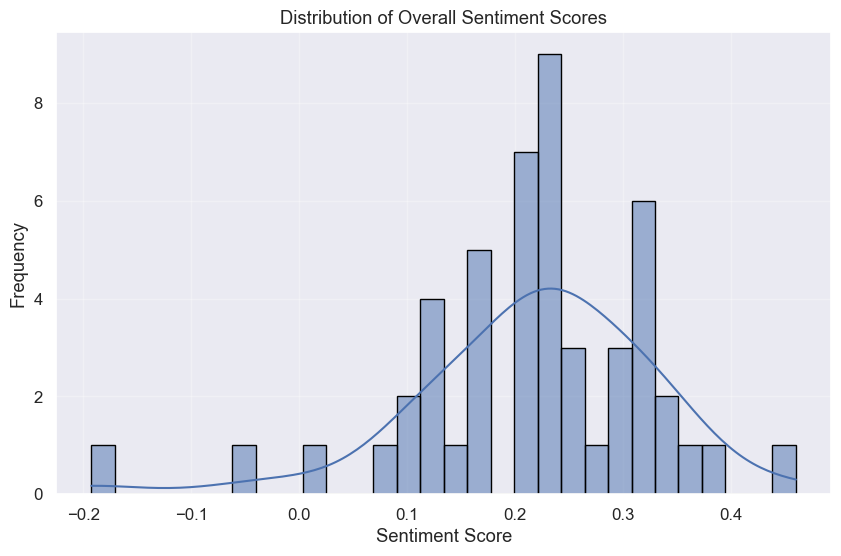

                                     column_name  percent_missing
ticker                                    ticker           100.00
relevance_score                  relevance_score           100.00
ticker_sentiment_score    ticker_sentiment_score           100.00
ticker_sentiment_label    ticker_sentiment_label           100.00
category_within_source    category_within_source            48.00
title                                      title             0.00
url                                          url             0.00
time_published                    time_published             0.00
authors                                  authors             0.00
summary                                  summary             0.00
banner_image                        banner_image             0.00
source                                    source             0.00
source_domain                      source_domain             0.00
topics                                    topics             0.00
overall_se

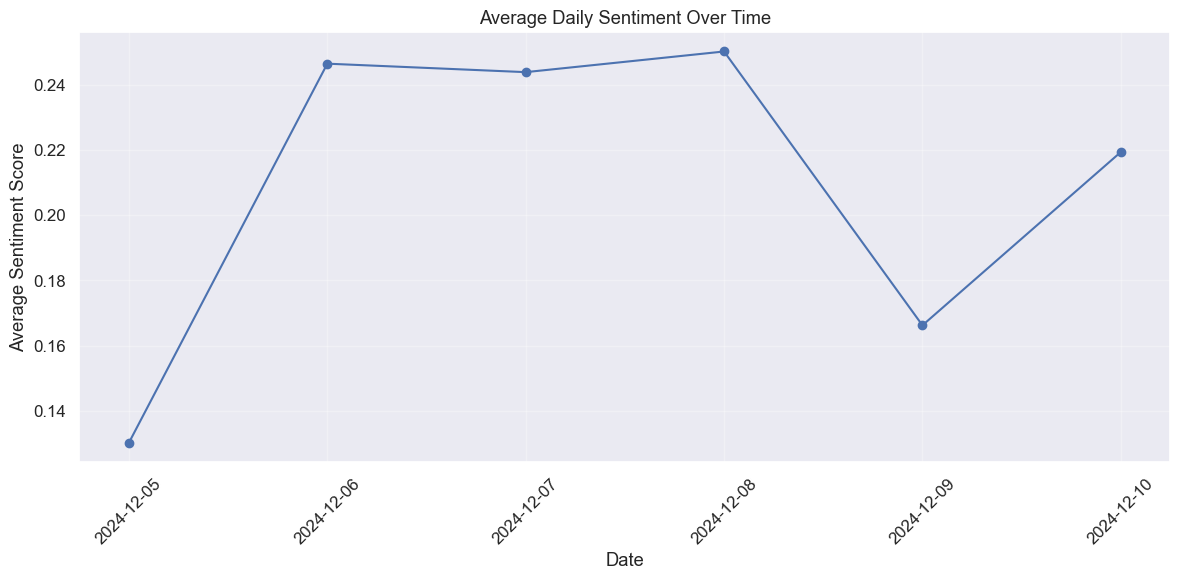

In [45]:
import os
import json
import logging
from typing import Optional, List
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s:%(message)s')
logger = logging.getLogger(__name__)

def load_news_csv(filepath: str, parse_dates: Optional[List[str]] = None) -> pd.DataFrame:
    """
    Load the news sentiment CSV into a DataFrame.
    
    Args:
        filepath (str): The path to the news sentiment CSV file.
        parse_dates (List[str], optional): List of column names to parse as datetime.
        
    Returns:
        pd.DataFrame: Loaded DataFrame.
    
    Raises:
        FileNotFoundError: If the file does not exist.
        ValueError: If the DataFrame is empty after loading.
    """
    if not os.path.exists(filepath):
        logger.error(f"File not found: {filepath}")
        raise FileNotFoundError(f"File not found: {filepath}")

    try:
        df = pd.read_csv(filepath, parse_dates=parse_dates, dtype=str)
        if df.empty:
            logger.error(f"The DataFrame loaded from {filepath} is empty.")
            raise ValueError("Loaded DataFrame is empty.")
        logger.info(f"Successfully loaded CSV: {filepath}, shape: {df.shape}")
        return df
    except Exception as e:
        logger.error(f"Error loading CSV from {filepath}: {str(e)}")
        raise e

def clean_news_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean the news DataFrame by handling missing values and ensuring proper dtypes.
    For instance, convert `overall_sentiment_score` to float and `overall_sentiment_label` to category.
    
    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: Cleaned DataFrame.
    """
    try:
        # Strip whitespace from string columns
        for col in df.select_dtypes(include='object').columns:
            df[col] = df[col].str.strip()

        # Convert numeric columns if present
        if 'overall_sentiment_score' in df.columns:
            df['overall_sentiment_score'] = pd.to_numeric(df['overall_sentiment_score'], errors='coerce')
        
        # Convert overall_sentiment_label to categorical if present
        if 'overall_sentiment_label' in df.columns:
            df['overall_sentiment_label'] = df['overall_sentiment_label'].astype('category')
        
        # # Handle missing values
        # df = df.fillna(value={
        #     'overall_sentiment_score': 0.0,
        #     'overall_sentiment_label': 'neutral',
        # })
        
        logger.info("News data cleaned and data types ensured.")
        return df
    except Exception as e:
        logger.error(f"Error cleaning news data: {str(e)}")
        raise e

def convert_time_published(df: pd.DataFrame, time_col: str = "time_published") -> pd.DataFrame:
    """
    Convert the `time_published` column to a proper datetime format (e.g. 'YYYY-MM-DD HH:MM:SS').

    Args:
        df (pd.DataFrame): Input DataFrame.
        time_col (str): Name of the time column.

    Returns:
        pd.DataFrame: DataFrame with converted datetime column.

    Raises:
        ValueError: If the time column is not found.
    """
    if time_col not in df.columns:
        logger.error(f"Column '{time_col}' not found in DataFrame.")
        raise ValueError(f"Column '{time_col}' not found in DataFrame.")
    
    try:
        # Format '20241210T121500' to 'YYYY-MM-DD HH:MM:SS'
        # The format looks like YYYYMMDDThhmmss
        # We can parse it directly by slicing:
        # YYYY-MM-DD hh:mm:ss
        # Example: 20241210T121500 -> 2024-12-10 12:15:00
        def parse_time_str(t):
            if pd.isnull(t):
                return pd.NaT
            t = str(t)
            if 'T' in t and len(t) == 15:
                # Format: YYYYMMDDThhmmss
                return pd.to_datetime(t, format='%Y%m%dT%H%M%S', errors='coerce')
            return pd.to_datetime(t, errors='coerce')

        df[time_col] = df[time_col].apply(parse_time_str)
        null_dates = df[time_col].isnull().sum()
        if null_dates > 0:
            logger.warning(f"{null_dates} rows in '{time_col}' could not be parsed as dates.")
        
        logger.info(f"Converted {time_col} to datetime.")
        return df
    except Exception as e:
        logger.error(f"Error converting {time_col} to datetime: {str(e)}")
        raise e

def parse_ticker_sentiment(df: pd.DataFrame, column_name: str = "ticker_sentiment") -> pd.DataFrame:
    """
    Parse the 'ticker_sentiment' column from a JSON-like string into structured columns.
    This function assumes 'ticker_sentiment' contains a JSON list of dictionaries.
    We will flatten this column to create a new DataFrame of ticker-level sentiment data.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        column_name (str): The column containing JSON-like ticker sentiment data.

    Returns:
        pd.DataFrame: A DataFrame with the ticker sentiments parsed (melted/expanded).
    """
    if column_name not in df.columns:
        logger.warning(f"'{column_name}' not found in DataFrame. No ticker sentiments to parse.")
        return df
    
    try:
        # Parse JSON from string
        def parse_json_cell(cell):
            try:
                return json.loads(cell)
            except:
                return np.nan

        df[column_name] = df[column_name].apply(parse_json_cell)
        # Explode the list of sentiments into rows
        df_exploded = df.explode(column_name)
        
        # Flatten the dictionary inside each cell
        # Each cell of column_name now a dict with keys: 
        # 'ticker', 'relevance_score', 'ticker_sentiment_score', 'ticker_sentiment_label'
        sentiment_cols = ['ticker', 'relevance_score', 'ticker_sentiment_score', 'ticker_sentiment_label']
        
        for col in sentiment_cols:
            df_exploded[col] = df_exploded[column_name].apply(lambda x: x.get(col) if isinstance(x, dict) else np.nan)
        
        # Convert numeric fields
        df_exploded['relevance_score'] = pd.to_numeric(df_exploded['relevance_score'], errors='coerce')
        df_exploded['ticker_sentiment_score'] = pd.to_numeric(df_exploded['ticker_sentiment_score'], errors='coerce')

        logger.info(f"Parsed ticker sentiments from '{column_name}'.")
        return df_exploded.drop(columns=[column_name])
    except Exception as e:
        logger.error(f"Error parsing ticker sentiment: {str(e)}")
        raise e

def summarize_news_data(df: pd.DataFrame):
    """
    Print summary statistics and show distribution of overall sentiment scores.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
    """
    try:
        logger.info("Generating summary statistics of the dataset.")
        summary = df.describe(include='all')
        print(summary)

        # Distribution of sentiment labels
        if 'overall_sentiment_label' in df.columns:
            label_counts = df['overall_sentiment_label'].value_counts()
            print("Overall Sentiment Label Counts:")
            print(label_counts)

        # Plot distribution of overall sentiment scores
        if 'overall_sentiment_score' in df.columns:
            plt.figure(figsize=(10,6))
            sns.histplot(df['overall_sentiment_score'], kde=True, bins=30, edgecolor='black')
            plt.title("Distribution of Overall Sentiment Scores")
            plt.xlabel("Sentiment Score")
            plt.ylabel("Frequency")
            plt.grid(True, alpha=0.3)
            plt.show()
        
        logger.info("Summary and distributions generated.")
    except Exception as e:
        logger.error(f"Error summarizing news data: {str(e)}")
        raise e

def check_news_missing_values(df: pd.DataFrame):
    """
    Check for missing values and print a report.

    Args:
        df (pd.DataFrame): Input DataFrame.
    """
    try:
        percent_missing = df.isnull().sum() * 100 / len(df)
        missing_values = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
        missing_values = missing_values.sort_values('percent_missing', ascending=False)
        logger.info("Checked missing values in the dataset.")
        print(missing_values)
    except Exception as e:
        logger.error(f"Error checking missing values: {str(e)}")
        raise e

def analyze_trends(df: pd.DataFrame, date_col: str = 'time_published', sentiment_col: str = 'overall_sentiment_score'):
    """
    Analyze trends in sentiment over time by aggregating daily average sentiment.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        date_col (str): The date column to group by.
        sentiment_col (str): The sentiment column to aggregate.
    """
    if date_col not in df.columns:
        logger.error(f"'{date_col}' not found in DataFrame.")
        return
    if sentiment_col not in df.columns:
        logger.error(f"'{sentiment_col}' not found in DataFrame.")
        return
    
    try:
        # Ensure date_col is datetime
        if not np.issubdtype(df[date_col].dtype, np.datetime64):
            logger.warning(f"Column '{date_col}' is not datetime. Attempting conversion.")
            df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        
        df['date_only'] = df[date_col].dt.date
        daily_sentiment = df.groupby('date_only')[sentiment_col].mean().reset_index()

        plt.figure(figsize=(12,6))
        plt.plot(daily_sentiment['date_only'], daily_sentiment[sentiment_col], marker='o')
        plt.title("Average Daily Sentiment Over Time")
        plt.xlabel("Date")
        plt.ylabel("Average Sentiment Score")
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        logger.info("Trends analysis completed.")
    except Exception as e:
        logger.error(f"Error analyzing trends: {str(e)}")
        raise e

# Example usage (adjust the file path as needed):
df_news = load_news_csv("/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Projects-Porfolio/Tech-Sector-Deep-Dive/data/news/AAPL_news_sentiment.csv")
df_news = clean_news_data(df_news)
df_news = convert_time_published(df_news, "time_published")
df_news_parsed = parse_ticker_sentiment(df_news, "ticker_sentiment")
summarize_news_data(df_news_parsed)
check_news_missing_values(df_news_parsed)
analyze_trends(df_news_parsed, date_col="time_published", sentiment_col="overall_sentiment_score")